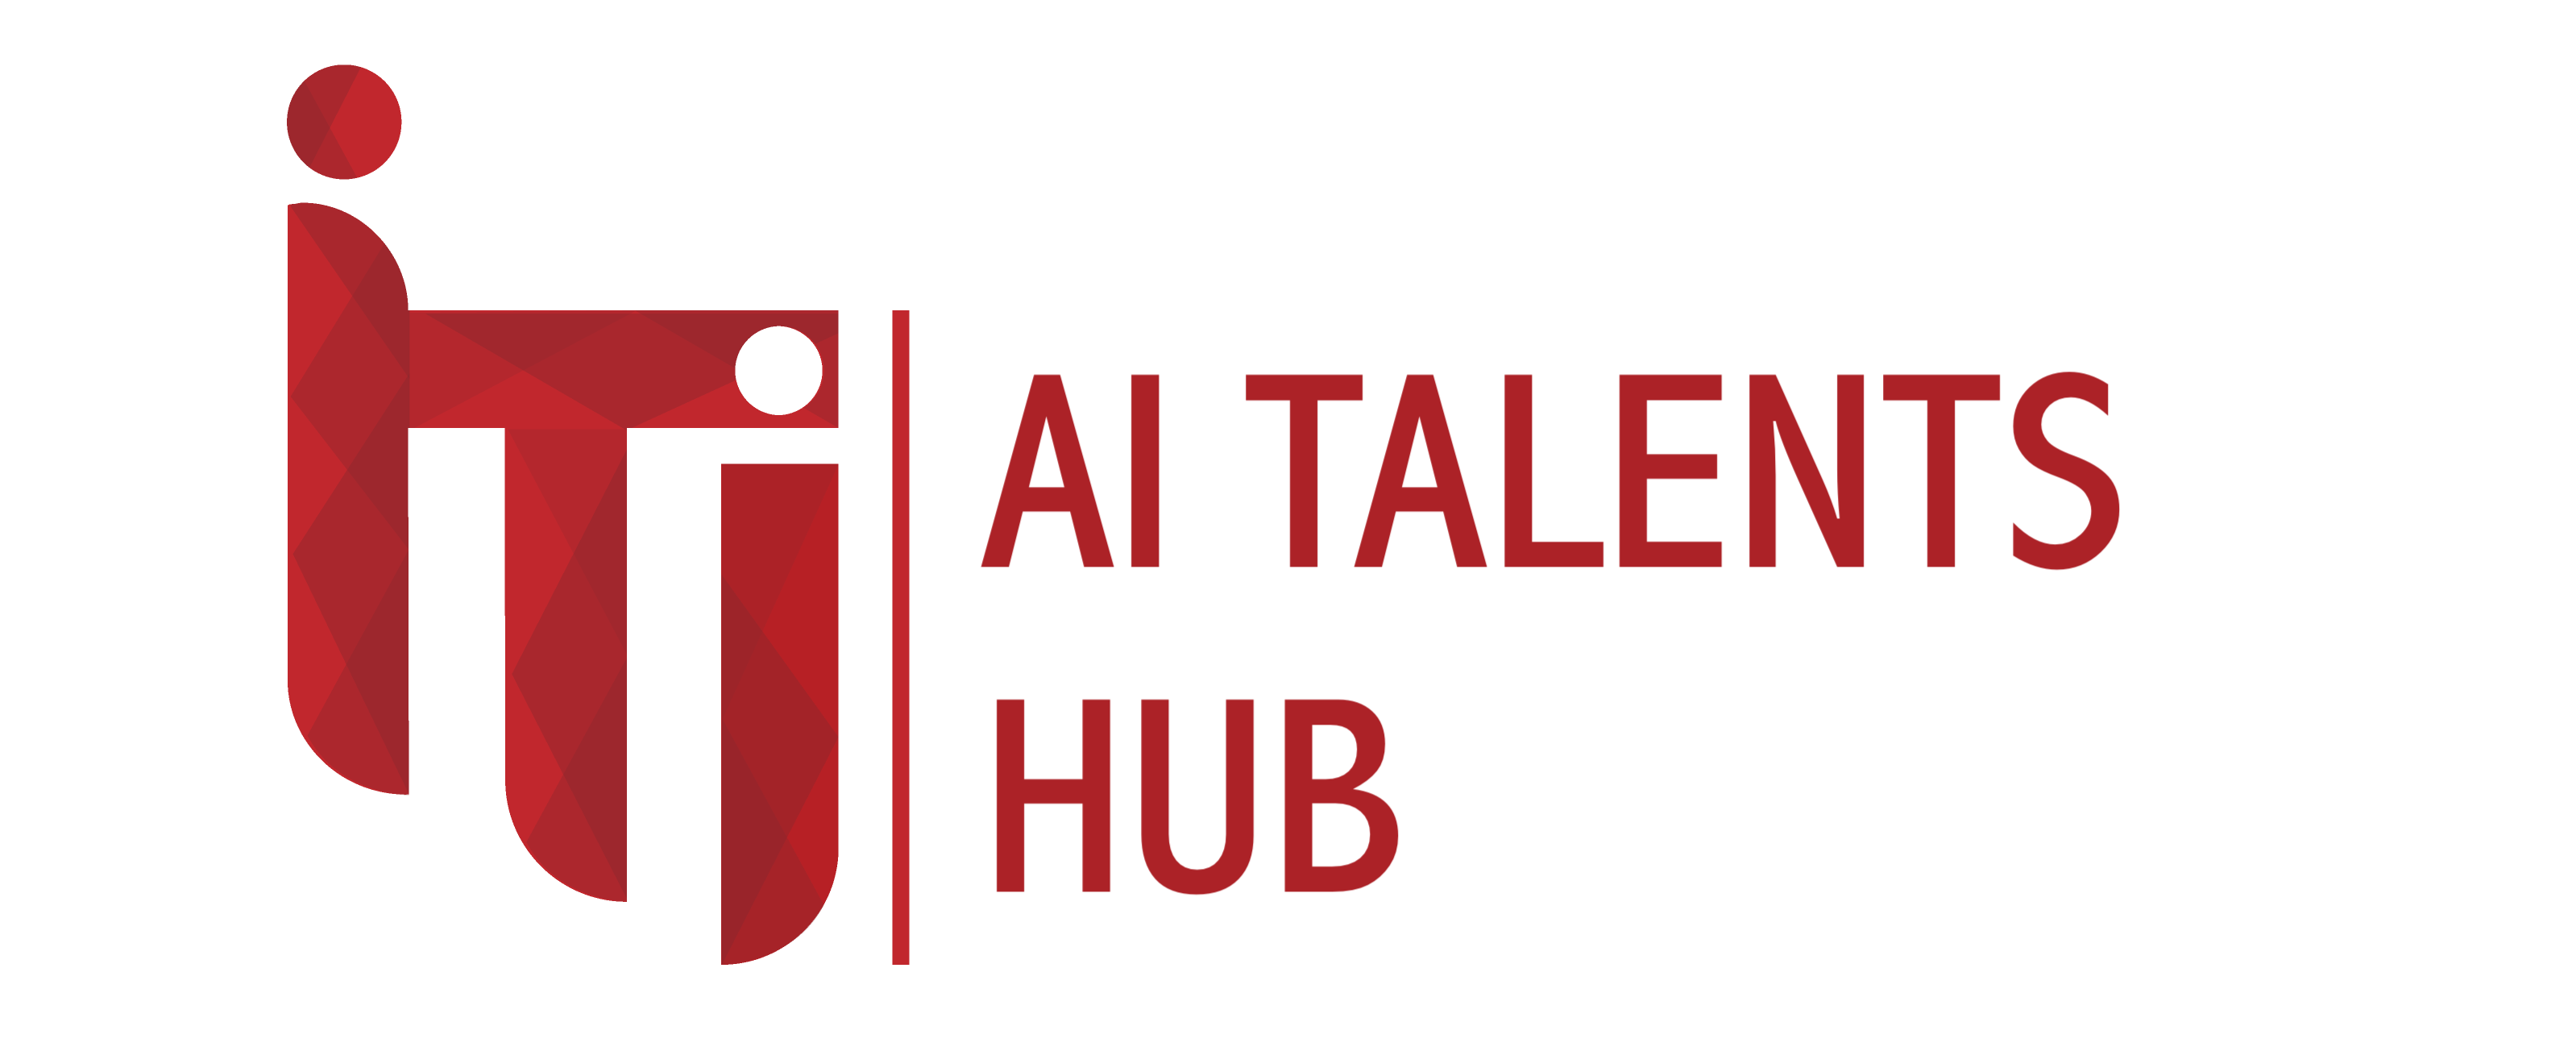

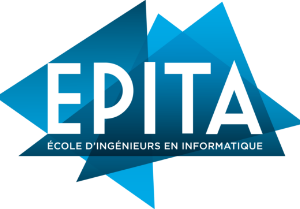

# Broadcasting
The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.



NumPy operations are usually done on pairs of arrays on an element-by-element basis. In the simplest case, the two arrays must have exactly the same shape, as in the following example:



In [1]:
import numpy as np

In [2]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b

array([2., 4., 6.])

NumPy’s broadcasting rule relaxes this constraint when the arrays’ shapes meet certain constraints. The simplest broadcasting example occurs when an array and a scalar value are combined in an operation:



In [114]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
print(a+b)
                

[3. 4. 5.]


## General Broadcasting Rules
When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when they are equal, or one of them is 1

If these conditions are not met, **a ValueError: operands could not be broadcast together exception is thrown**, indicating that the arrays have incompatible shapes. The size of the resulting array is the size that is not 1 along each axis of the inputs.


### they are equal, or


In [93]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
print(a * b)
print(f"{a.shape}\n{b.shape}")    

[2. 4. 6.]
(3,)
(3,)


### one of them is 1


In [94]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0, 2.0])
a * b
print(f"{a.shape}\n{b.shape}")

(3,)
(3,)


In [123]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0])

## shape     3
### shape    2

## a >>     3x1
##            2
a_n= b.reshape(2,1)
print(a_n,b,"\n\n", a_n*b)


[[2.]
 [2.]] [2. 2.] 

 [[4. 4.]
 [4. 4.]]


In [111]:
a = np.array([1.0, 2.0, 3.0])
b = np.array([2.0, 2.0])
print(f"{a.shape}\n{b.shape}")
aa=a.reshape(3,1) 
print(f"\n{aa.shape}\n{b.shape}")
aa+b

(3,)
(2,)

(3, 1)
(2,)


array([[3., 3.],
       [4., 4.],
       [5., 5.]])

In [126]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
## 4
## 3
print(a[:, np.newaxis] * b)
print(a[:, np.newaxis].shape ,"\n" ,b.shape)

[[ 0.  0.  0.]
 [10. 20. 30.]
 [20. 40. 60.]
 [30. 60. 90.]]
(4, 1) 
 (3,)


In [100]:
a[:, np.newaxis] 

array([[ 0.],
       [10.],
       [20.],
       [30.]])

# Axis of rows and axis of columns of 2D array and Aggregate


## NUMPY AXES ARE LIKE AXES IN A COORDINATE SYSTEM


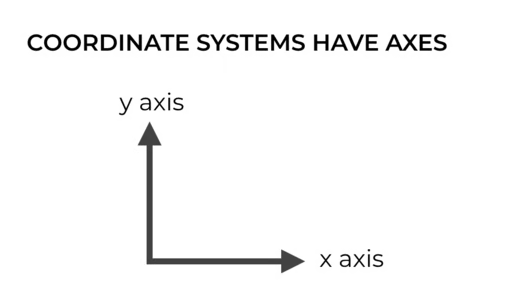

So if we have a point at position (2, 3), we’re basically saying that it lies 2 units along the x axis and 3 units along the y axis.



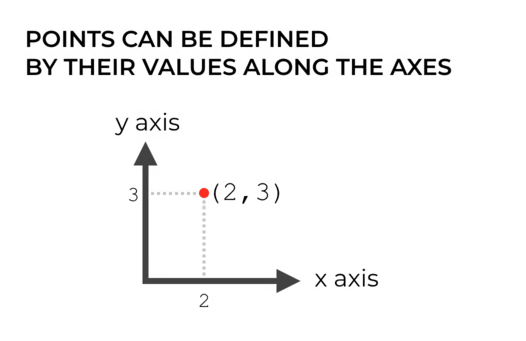

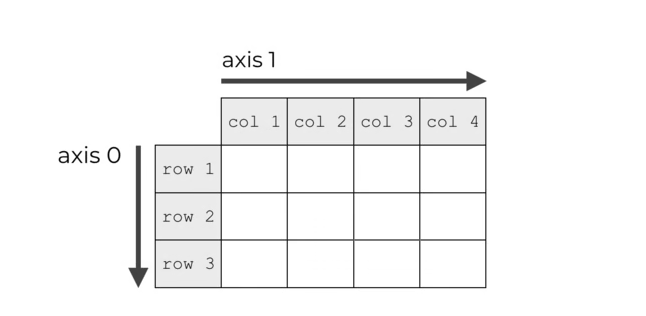

### AXIS 0 IS THE DIRECTION ALONG THE ROWS
In a NumPy array, axis 0 is the “first” axis.

Assuming that we’re talking about multi-dimensional arrays, axis 0 is the axis that runs downward down the rows.

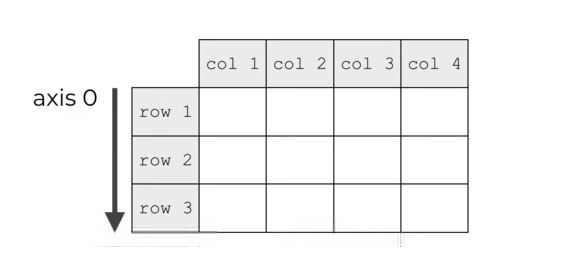

### AXIS 1 IS THE DIRECTION ALONG THE COLUMNS
In a multi-dimensional NumPy array, axis 1 is the second axis.

When we’re talking about 2-d and multi-dimensional arrays, axis 1 is the axis that runs horizontally across the columns.

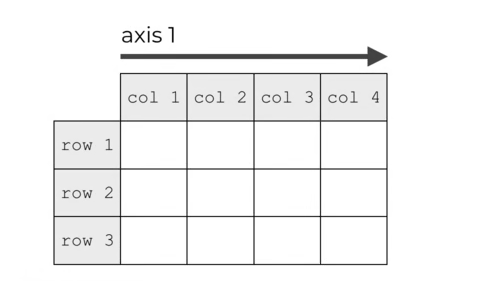

### EXAMPLES OF HOW NUMPY AXES ARE USED


In [1]:
import numpy as np
np_array_2d = np.arange(0, 6).reshape([2,3])
print(np_array_2d)

[[0 1 2]
 [3 4 5]]


In [2]:
np.sum(np_array_2d, axis = 0)

array([3, 5, 7])

Why? Doesn’t axis 0 refer to the rows?

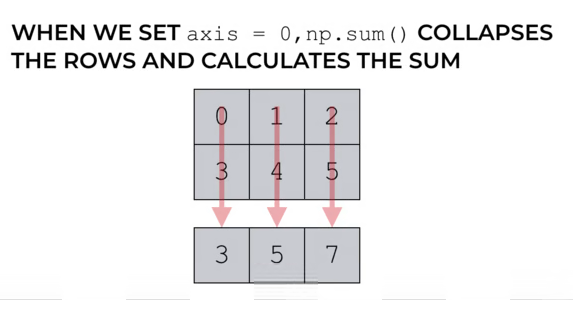

In [3]:
print(np_array_2d)

[[0 1 2]
 [3 4 5]]


In [4]:
np.sum(np_array_2d, axis = 1)

array([ 3, 12])

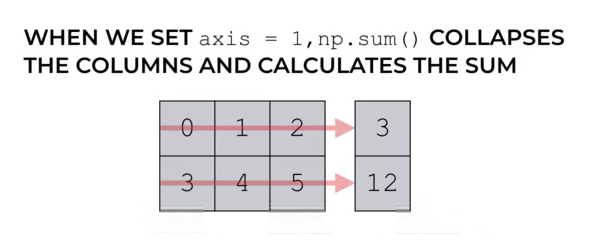

### NUMPY CONCATENATE


In [8]:
np_array_1s = np.array([[1,1,1],[1,1,1]])
np_array_9s = np.array([[9,9,9],[9,9,9]])

In [10]:
np.concatenate([np_array_1s, np_array_9s], axis = 1)

array([[1, 1, 1, 9, 9, 9],
       [1, 1, 1, 9, 9, 9]])

In [11]:
np.concatenate([np_array_1s, np_array_9s], axis = 0)

array([[1, 1, 1],
       [1, 1, 1],
       [9, 9, 9],
       [9, 9, 9]])

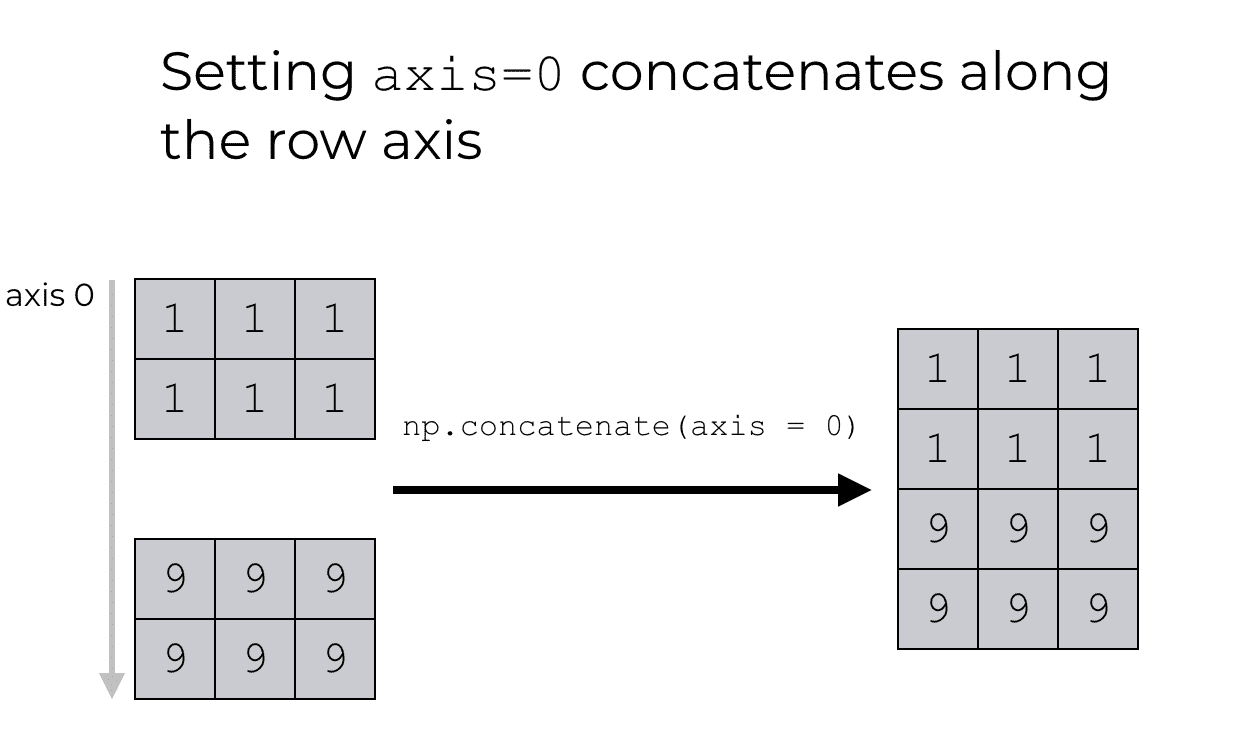

In [13]:
np.concatenate([np_array_1s, np_array_9s], axis = 1)

array([[1, 1, 1, 9, 9, 9],
       [1, 1, 1, 9, 9, 9]])

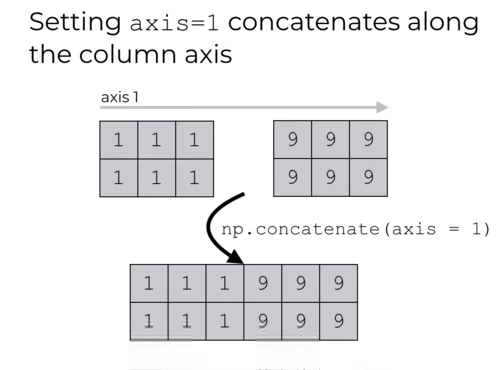

## WARNING: 1-DIMENSIONAL ARRAYS WORK DIFFERENTLY


The fact that 1-d arrays have only one axis can cause some results that confuse NumPy beginners.

In [5]:
np_array_1s_1dim = np.array([1,1,1])
np_array_9s_1dim = np.array([9,9,9])
print(np_array_1s_1dim)
print(np_array_9s_1dim)

[1 1 1]
[9 9 9]


[1 1 1]
[9 9 9]


This is different from how the function works on 2-dimensional arrays. If we use np.concatenate() with axis = 0 on 2-dimensional arrays, the arrays will be concatenated together vertically.

What’s going on here?

Recall what I just mentioned a few paragraphs ago: 1-dimensional NumPy arrays only have one axis. Axis 0.

In [16]:
np.concatenate([np_array_1s_1dim, np_array_9s_1dim], axis = 0)

array([1, 1, 1, 9, 9, 9])

In [17]:
np.concatenate([np_array_1s_1dim, np_array_9s_1dim], axis = 1)

AxisError: axis 1 is out of bounds for array of dimension 1

# How to read a simple dataset with Numpy

With missing values
Use numpy.genfromtxt.

numpy.genfromtxt will either

return a masked array masking out 

1.   missing values (if usemask=True), or

2.   fill in the missing value with the value specified in filling_values (default is np.nan for float, -1 for int).




In [17]:
print(open("dataset/gfg_example2.csv").read())  

1,2,3
4,5,6
7,8,9


In [25]:
print(open("dataset/gfg_example2-unkown.csv").read())  

1,,3
4,5,6
7,8,


In [65]:
np.genfromtxt("dataset/gfg_example2.csv", delimiter=",",usemask=True) 

masked_array(
  data=[[1.0, 2.0, 3.0],
        [4.0, 5.0, 6.0],
        [7.0, 8.0, 9.0]],
  mask=[[False, False, False],
        [False, False, False],
        [False, False, False]],
  fill_value=1e+20)

In [55]:
file_data=np.genfromtxt("dataset/gfg_example2-unkown.csv", delimiter=",",usemask=True) 
file_data

masked_array(
  data=[[1.0, --, 3.0],
        [4.0, 5.0, 6.0],
        [7.0, 8.0, --]],
  mask=[[False,  True, False],
        [False, False, False],
        [False, False,  True]],
  fill_value=1e+20)

In [56]:
file_data.data

array([[ 1., nan,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8., nan]])

In [57]:
file_data.mask

array([[False,  True, False],
       [False, False, False],
       [False, False,  True]])

In [40]:
data=np.genfromtxt("dataset/gfg_example2-unkown.csv", delimiter=",") 
data

array([[ 1., nan,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8., nan]])

###  ---------------------------------------       np.loadtxt()           ----------------------------------

In [58]:
filename = 'dataset/gfg_example2.csv'
print(open('dataset/gfg_example2.csv').read())  

1,2,3
4,5,6
7,8,9


In [59]:
print(open("dataset/gfg_example2-unkown.csv").read())  

1,,3
4,5,6
7,8,


In [63]:
import numpy as np
  
# Setting name of the file that the data is to be extarcted from in python
filename = 'dataset/gfg_example2.csv'
  
# Loading file data into numpy array and storing it in variable called data_collected
data_collected = np.loadtxt(filename, delimiter=',')
  
# Printing data stored
print(data_collected)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [64]:
import numpy as np
  
# Setting name of the file that the data is to be extarcted from in python
filename = 'dataset/gfg_example2-unkown.csv'
  
# Loading file data into numpy array and storing it in variable called data_collected
data_collected = np.loadtxt(filename, delimiter=',')
  
# Printing data stored
print(data_collected)

ValueError: could not convert string to float: 

In [129]:
import numpy as np

x = np.array([[1, 2, 3], 
              [4, 5, 6],
              [7, 8, 10]], np.int32)

np.savetxt("test.csv", x,fmt="%.0f", delimiter=",")

In [81]:
import numpy as np

x = np.array([[1, 2, 3], 
              [4, 5, 6],
              [7, 8, 9]], np.int32)

np.savetxt("test1.csv", x, delimiter=",")

In [130]:
import numpy as np

x = np.array([[1, 2, 3], 
              [4, 5, 6],
              [7, 8, 9]], np.int32)

np.savetxt("test.txt", x,fmt="%2.0f", delimiter=",")

In [132]:
import numpy as np

x = np.array([[1, 2, 3], 
              [4, 5, 6],
              [7, 8, 9]], np.int32)

np.savetxt("test1.txt", x,fmt="%5.2f", delimiter="---")